In [7]:
import numpy as np
import pandas as pd

## *** REVIEW STUFFS ***
b_pandas = []
r_dtypes1 = {"stars": np.float16, 
            "useful": np.int32, 
            "funny": np.int32,
            "cool": np.int32,}
with open("yelp_academic_dataset_review.json", "r", encoding='utf8') as f:
    reader = pd.read_json(f, orient="records", lines=True, dtype=r_dtypes1, chunksize=1000)
    for chunk in reader:
        reduced_chunk = chunk.drop(columns=['review_id', 'user_id', 'cool', 'funny']).query("date >= '2019-12-01'")
        b_pandas.append(reduced_chunk)
b_rev = pd.concat(b_pandas, ignore_index=True)

## *** BUSINESS STUFFS ***
business_pandas = []
r_dtypes2 = {"stars": np.float16, 
            "latitude": np.int32, 
            "longitude": np.int32,}
with open("yelp_academic_dataset_business.json", "r", encoding='utf8') as f:
    reader = pd.read_json(f, orient="records", lines=True, dtype=r_dtypes2, chunksize=1000)
    for chunk in reader:
        reduced_chunk = chunk.drop(columns=['is_open', 'longitude','latitude','hours'])#.query("city >= 'philadelphia'")
        reduced_chunk = reduced_chunk.dropna() #Errors when joining unless this is done.
        business_pandas.append(reduced_chunk)
    
business_pandas = pd.concat(business_pandas, ignore_index=True)
philly = business_pandas.loc[business_pandas['city'].str.contains("hilad")] # Filter for Philly businesses
p_rest = philly.loc[philly['categories'].str.contains("estaur")]            # Filter for restaurants
## *** REVIEWS:  b_rev       BUSINESSES:  p_rest

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5da761c198>], dtype=object)

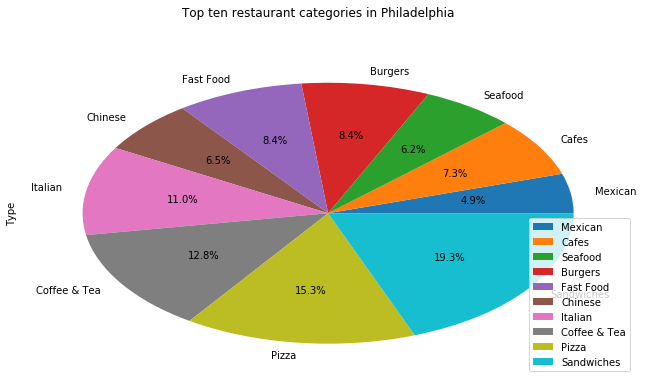

In [8]:
# Remove all but needed columns for progress report
restFilt = p_rest[['business_id', 'categories']]

# Category grouping for progress report
wrds = restFilt['categories'].tolist()
d = dict()
for strList in wrds:
    w = strList.split(", ")
    for csv in w:
        if csv in d:
            d[csv] = d[csv] + 1
        else:
            d[csv] = 1
# Not real restaurant categories
trash = ['Restaurants', 'Nightlife', 'Food', 'Event Planning & Services', 
         'Bars', 'Breakfast & Brunch', 'American (Traditional)', 'American (New)']
for junk in trash:
    d.pop(junk, None)
sortMe = sorted(d.items(), key=lambda x: x[1])
sortMe = sortMe[-10:]
cats = []
for w in sortMe:
    cats.append(w[0])
# ......  end category grouping for progress report

inn = []
for x in cats:
    y = restFilt[restFilt['categories'].str.contains(x)]
    inn.append(y)
innOut = pd.concat(inn, ignore_index=True)
for x in cats:
    innOut[x] = np.where(innOut['categories'].str.contains(x), 1, 0)
innOut
groupOut = pd.DataFrame(columns = ['Type'])
for x in cats:
    groupOut.loc[x] = innOut[x].sum()
groupOut
pieMe = groupOut.groupby('Type')

%matplotlib inline
import matplotlib.pyplot as plt
groupOut.plot.pie(title="Top ten restaurant categories in Philadelphia", subplots=True, autopct='%1.1f%%', figsize=(11,6))